# Benchmarking
This is a first stab at making benchmarks from Python instead of shell/gnuplot, which is the method that has been used until now.
It may make sense to add code for generating new benchmark numbers, e.g. using one of the methods
[listed in this stackoverflow article](https://stackoverflow.com/questions/3652554/calling-java-from-python), or anything else really

The main motivation behind revamping the test setup is not really to use python, but to uncover more information about the
actual performance.  For instance, it seems like the regex matcher at present has an 18% disadvantage wrs to java matching.
However, that is based on the "unfair test", which is deliberately unfair, giving java a good chance to outperform rmatch.

Also the the test runs are short, and there may be benefit in running more extensive tests, both with respect to
length of input and with respect to number of regular expressions.  The complexity of the expressions should also be
variable.

However, the idea of benchmarking towards the java regex library is still a good one, and one that the revamped test regime should
build on.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

TODO: Maybe fix the date formatting using [this trick](https://stackoverflow.com/questions/23294197/plotting-chart-with-epoch-time-x-axis-using-matplotlib).

In [2]:
df0 = pd.read_csv('rmatch-tester/measurements/handle-the-wuthering-heights-corpus.csv')
df1 = df0.tail(5)

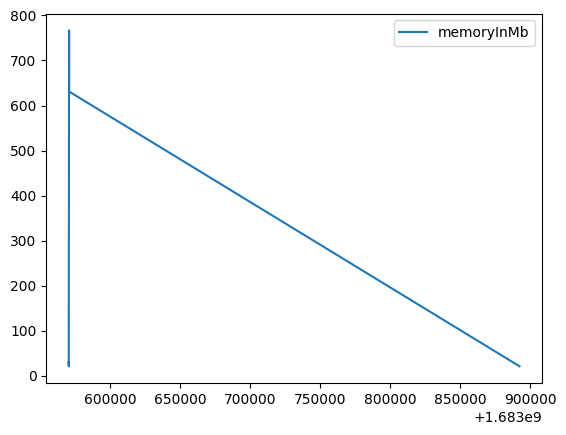

In [3]:
plt.plot(df1["secondsSinceEpoch"], df1["memoryInMb"], label="memoryInMb")
plt.legend()
plt.show()

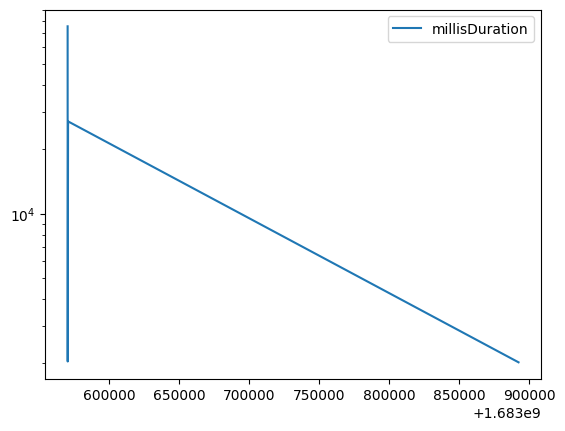

In [4]:
plt.plot(df1["secondsSinceEpoch"], df1["millisDuration"], label="millisDuration")
plt.yscale("log")
plt.legend()
plt.show()

In [5]:
df = pd.read_csv('rmatch-tester/logs/logfile-2023-05-08-20:37:45.csv')

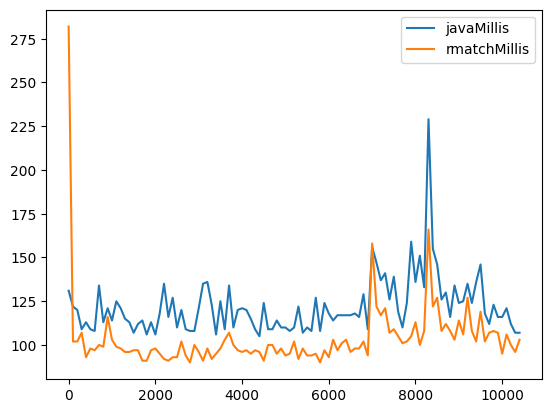

In [6]:
plt.plot(df["NoOfRegexps"], df[" javaMillis"], label="javaMillis")
plt.plot(df["NoOfRegexps"], df[" regexMillis"], label="rmatchMillis")
plt.legend()
plt.show()

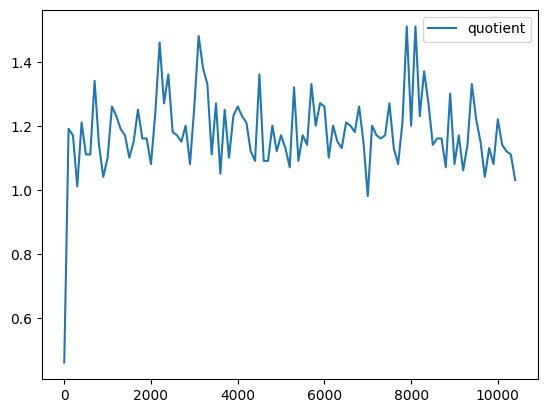

In [7]:
plt.plot(df["NoOfRegexps"], df[" quotient"], label="quotient")
plt.legend()
plt.show()

In [8]:
df[" quotient"].std()

0.12511474586834134

In [9]:
df[" quotient"].mean()

1.181047619047619

In [10]:
df[" javaMillis"].std()

16.22013739593032

In [11]:
df[" javaMillis"].mean()

121.65714285714286

In [12]:
df[" regexMillis"].std()

21.037869221761536

In [13]:
df[" regexMillis"].mean()

103.81904761904762

# Study the large corpus test and evolution over time

In [14]:
largeCorpusDf = pd.read_csv('./rmatch-tester/logs/large-corpus-log.csv')

In [15]:
largeCorpusDf


,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio
0,1684151426228,99d2b216-dc52-44c0-b379-3a74a11681a7,master,rmatch,917,4475,java,54,391,0,96068,1154369,1179077,0.000000
1,1684151734259,e3b088d2-65a6-4766-994f-a6bcb020ae63,master,rmatch,599,6621,java,55,375,0,96068,1154369,1179077,0.000000
2,1684152005265,42bb90f0-1649-490b-8826-f918c9092e6a,master,rmatch,247,4169,java,54,351,96068,0,1154369,1179077,0.000000
3,1684152107237,700981ac-a4cd-49a1-9ee3-f17d288559a9,master,rmatch,769,19949,java,148,1709,207832,6111,1154369,1179077,0.000000
4,1684152163314,0f75451c-5881-456c-9eea-d3e5207e35c1,master,rmatch,171,9560,java,100,950,142322,262,1154369,1179077,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1685396887934,73EE6D74-51C3-46AD-9650-47FAD020E03E,master,rmatch,1376,154173,java,520,10437,1144409,8,19566,1154369,14.771773
100,1685397054947,73EE6D74-51C3-46AD-9650-47FAD020E03E,master,rmatch,1176,151514,java,520,12073,1144409,8,19566,1154369,12.549822
101,1688293228362,ee991b8d-eea0-46f3-9384-0db904fbb63f,master,rmatch,1227,392527,java,517,19282,1144409,8,19566,1154369,20.357172
102,1688294215975,e0344a5f-fe7f-40dc-ac17-9246520282f9,master,rmatch,1586,577477,java,521,64671,1144409,8,19566,1154369,8.929459


In [16]:
largeCorpusDf["regexPerMilli1"] = (largeCorpusDf["noOfRegexps"]  *  largeCorpusDf["corpusLength"]) /   largeCorpusDf["durationInMillis1"]
largeCorpusDf["regexPerMilli2"] = (largeCorpusDf["noOfRegexps"]  *  largeCorpusDf["corpusLength"]) /   largeCorpusDf["durationInMillis2"]
largeCorpusDf["regex2to1ratio"] = largeCorpusDf["regexPerMilli2"] /   largeCorpusDf["regexPerMilli1"]



In [17]:
largeCorpusDf

,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio,regexPerMilli1,regexPerMilli2,regex2to1ratio
0,1684151426228,99d2b216-dc52-44c0-b379-3a74a11681a7,master,rmatch,917,4475,java,54,391,0,96068,1154369,1179077,0.000000,3.041542e+08,3.481048e+09,11.445013
1,1684151734259,e3b088d2-65a6-4766-994f-a6bcb020ae63,master,rmatch,599,6621,java,55,375,0,96068,1154369,1179077,0.000000,2.055717e+08,3.629573e+09,17.656000
2,1684152005265,42bb90f0-1649-490b-8826-f918c9092e6a,master,rmatch,247,4169,java,54,351,96068,0,1154369,1179077,0.000000,3.264788e+08,3.877749e+09,11.877493
3,1684152107237,700981ac-a4cd-49a1-9ee3-f17d288559a9,master,rmatch,769,19949,java,148,1709,207832,6111,1154369,1179077,0.000000,6.822848e+07,7.964248e+08,11.672908
4,1684152163314,0f75451c-5881-456c-9eea-d3e5207e35c1,master,rmatch,171,9560,java,100,950,142322,262,1154369,1179077,0.000000,1.423734e+08,1.432726e+09,10.063158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1685396887934,73EE6D74-51C3-46AD-9650-47FAD020E03E,master,rmatch,1376,154173,java,520,10437,1144409,8,19566,1154369,14.771773,1.465003e+05,2.164069e+06,14.771773
100,1685397054947,73EE6D74-51C3-46AD-9650-47FAD020E03E,master,rmatch,1176,151514,java,520,12073,1144409,8,19566,1154369,12.549822,1.490713e+05,1.870818e+06,12.549822
101,1688293228362,ee991b8d-eea0-46f3-9384-0db904fbb63f,master,rmatch,1227,392527,java,517,19282,1144409,8,19566,1154369,20.357172,5.754097e+04,1.171371e+06,20.357172
102,1688294215975,e0344a5f-fe7f-40dc-ac17-9246520282f9,master,rmatch,1586,577477,java,521,64671,1144409,8,19566,1154369,8.929459,3.911218e+04,3.492506e+05,8.929458


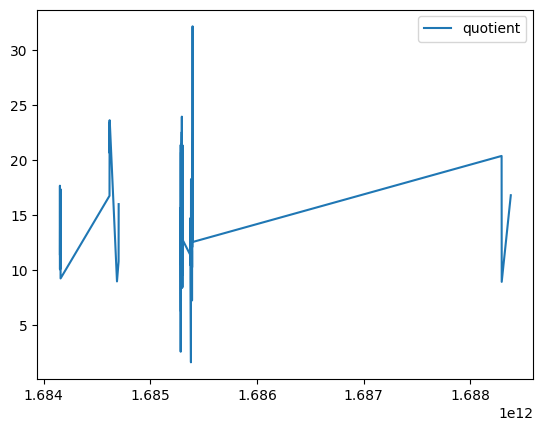

In [18]:
plt.plot(largeCorpusDf["timestamp"], largeCorpusDf["regex2to1ratio"], label="quotient")
plt.legend()
plt.show()

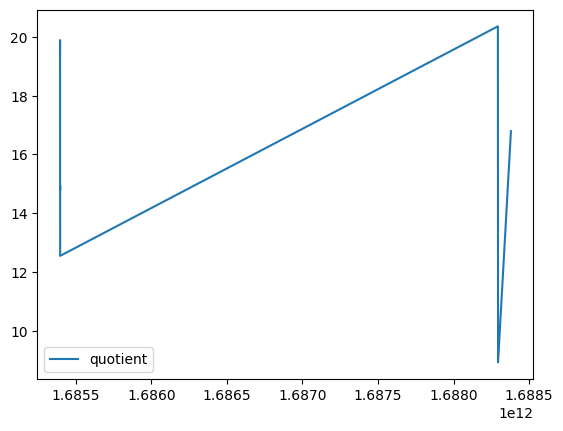

In [19]:
lastTen = largeCorpusDf.iloc[-10:]
plt.plot(lastTen["timestamp"], lastTen["regex2to1ratio"], label="quotient")
plt.legend()
plt.show()

In [20]:

lastTen

,timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,2to1Ratio,regexPerMilli1,regexPerMilli2,regex2to1ratio
94,1685396002604,73EE6D74-51C3-46AD-9650-47FAD020E03E,master,rmatch,679,187041,java,519,9654,1144409,8,19566,1154369,19.374456,120756.325373,2.339588e+06,19.374456
95,1685396203777,73EE6D74-51C3-46AD-9650-47FAD020E03E,master,rmatch,1100,189167,java,517,9511,1144409,8,19566,1154369,19.889286,119399.175617,2.374764e+06,19.889286
96,1685396380264,73EE6D74-51C3-46AD-9650-47FAD020E03E,master,rmatch,1816,165109,java,517,8824,1144409,8,19566,1154369,18.711355,136796.806074,2.559654e+06,18.711355
97,1685396551645,73EE6D74-51C3-46AD-9650-47FAD020E03E,master,rmatch,2202,157776,java,516,10671,1144409,8,19566,1154369,14.785494,143154.750114,2.116614e+06,14.785493
98,1685396720155,73EE6D74-51C3-46AD-9650-47FAD020E03E,master,rmatch,1526,155017,java,516,10368,1144409,8,19566,1154369,14.951486,145702.625222,2.178471e+06,14.951485
99,1685396887934,73EE6D74-51C3-46AD-9650-47FAD020E03E,master,rmatch,1376,154173,java,520,10437,1144409,8,19566,1154369,14.771773,146500.255259,2.164069e+06,14.771773
100,1685397054947,73EE6D74-51C3-46AD-9650-47FAD020E03E,master,rmatch,1176,151514,java,520,12073,1144409,8,19566,1154369,12.549822,149071.266378,1.870818e+06,12.549822
101,1688293228362,ee991b8d-eea0-46f3-9384-0db904fbb63f,master,rmatch,1227,392527,java,517,19282,1144409,8,19566,1154369,20.357172,57540.968784,1.171371e+06,20.357172
102,1688294215975,e0344a5f-fe7f-40dc-ac17-9246520282f9,master,rmatch,1586,577477,java,521,64671,1144409,8,19566,1154369,8.929459,39112.179107,3.492506e+05,8.929458
103,1688379457803,f95c455d-75c3-4562-9900-13db30384c9e,master,rmatch,1518,204116,java,516,12156,1144409,8,19566,1154369,16.791378,110654.646642,1.858044e+06,16.791379


In [21]:
import sqlite3

In [22]:


df = pd.read_csv('./rmatch-tester/logs/large-corpus-log.csv')
print(df)


         timestamp                          testSeriesId metadata   
0    1684151426228  99d2b216-dc52-44c0-b379-3a74a11681a7   master  \
1    1684151734259  e3b088d2-65a6-4766-994f-a6bcb020ae63   master   
2    1684152005265  42bb90f0-1649-490b-8826-f918c9092e6a   master   
3    1684152107237  700981ac-a4cd-49a1-9ee3-f17d288559a9   master   
4    1684152163314  0f75451c-5881-456c-9eea-d3e5207e35c1   master   
..             ...                                   ...      ...   
99   1685396887934  73EE6D74-51C3-46AD-9650-47FAD020E03E   master   
100  1685397054947  73EE6D74-51C3-46AD-9650-47FAD020E03E   master   
101  1688293228362  ee991b8d-eea0-46f3-9384-0db904fbb63f   master   
102  1688294215975  e0344a5f-fe7f-40dc-ac17-9246520282f9   master   
103  1688379457803  f95c455d-75c3-4562-9900-13db30384c9e   master   

    matcherTypeName1  usedMemoryInMb1  durationInMillis1 matcherTypeName2   
0             rmatch              917               4475             java  \
1             rma

In [23]:
import os
dbfile = 'measurements.sqlite'
if os.path.exists(dbfile):
    os.remove(dbfile)


In [24]:

table_name = 'Measurements'

query = f'Create table if not Exists {table_name} (timestamp,testSeriesId,metadata,matcherTypeName1,usedMemoryInMb1,durationInMillis1,matcherTypeName2,usedMemoryInMb2,durationInMillis2,noOfMatches,noOfMismatches,noOfRegexps,corpusLength,"2to1Ratio")'


In [25]:
conn = sqlite3.connect(dbfile)
conn.execute(query)
df.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()
conn.close()

In [26]:
conn = sqlite3.connect(dbfile)
r_df = pd.read_sql("select * from Measurements",conn)
print(r_df)

         timestamp                          testSeriesId metadata   
0    1684151426228  99d2b216-dc52-44c0-b379-3a74a11681a7   master  \
1    1684151734259  e3b088d2-65a6-4766-994f-a6bcb020ae63   master   
2    1684152005265  42bb90f0-1649-490b-8826-f918c9092e6a   master   
3    1684152107237  700981ac-a4cd-49a1-9ee3-f17d288559a9   master   
4    1684152163314  0f75451c-5881-456c-9eea-d3e5207e35c1   master   
..             ...                                   ...      ...   
99   1685396887934  73EE6D74-51C3-46AD-9650-47FAD020E03E   master   
100  1685397054947  73EE6D74-51C3-46AD-9650-47FAD020E03E   master   
101  1688293228362  ee991b8d-eea0-46f3-9384-0db904fbb63f   master   
102  1688294215975  e0344a5f-fe7f-40dc-ac17-9246520282f9   master   
103  1688379457803  f95c455d-75c3-4562-9900-13db30384c9e   master   

    matcherTypeName1  usedMemoryInMb1  durationInMillis1 matcherTypeName2   
0             rmatch              917               4475             java  \
1             rma

In [27]:
with open('summarize-large-corpus-trials.sql', 'r') as file:
    summarizerSql = file.read().rstrip()


In [28]:
summarizerSql

"select min(timestamp) as timestamp,\n       testSeriesId,\n       metadata,\n       noOfMatches,\n       noOfMismatches,\n       corpusLength,\n       noOfRegexps,\n       min(durationInMillis2) as 'minJavaDuration',\n       max(durationInMillis2) as 'maxJavaDuration',\n       avg(durationInMillis2) as 'avgJavaDuration',\n       min(durationInMillis1) as 'minRegexDuration',\n       max(durationInMillis1) as 'maxRegexDuration',\n       avg(durationInMillis1) as 'avgRegexDuration',\n--       stdev(durationInMillis2) as 'stdevJavaDuration',\n--       stdev(durationInMillis1) as 'stdevRegexDuration',\n       ((1.0*min(durationInMillis1))/6154) as 'againstBestJavaRatio',\n       ((1.0*min(durationInMillis1))/(1.0*min(durationInMillis2))) as 'minMinRatio',\n       ((1.0*max(durationInMillis1))/(1.0*max(durationInMillis2))) as 'maxMaxRatio',\n       ((1.0*avg(durationInMillis1))/(1.0*avg(durationInMillis2))) as 'avgAvgRatio'\n--       ((1.0*stdev(durationInMillis1))/(1.0*stdev(durationInMill

In [29]:

conn = sqlite3.connect(dbfile)
r_df = pd.read_sql(summarizerSql, conn)

print(r_df)
conn.close()


       timestamp                          testSeriesId   
0  1685300128023  A9B69B90-AAB2-4AD3-A421-5E232DF8C8BD  \
1  1685374976474  8383FDD9-A509-4046-8F04-FD430BB07BA8   
2  1685380210149  28CC3751-BA44-4B0D-BA81-27F159A3079C   
3  1685390284561  58C63D2D-F066-415C-AE24-E045B873D387   
4  1685395218314  73EE6D74-51C3-46AD-9650-47FAD020E03E   
5  1688293228362  ee991b8d-eea0-46f3-9384-0db904fbb63f   
6  1688294215975  e0344a5f-fe7f-40dc-ac17-9246520282f9   
7  1688379457803  f95c455d-75c3-4562-9900-13db30384c9e   

                             metadata  noOfMatches  noOfMismatches   
0  u/la3lma/refactoring-a-la-chatgpt2      1144409               8  \
1                              master      1144409               8   
2     u/la3lma/optimize-using-chatgtp      1144409               8   
3  u/la3lma/refactoring-a-la-chatgpt2      1144409               8   
4                              master      1144409               8   
5                              master      1144409       

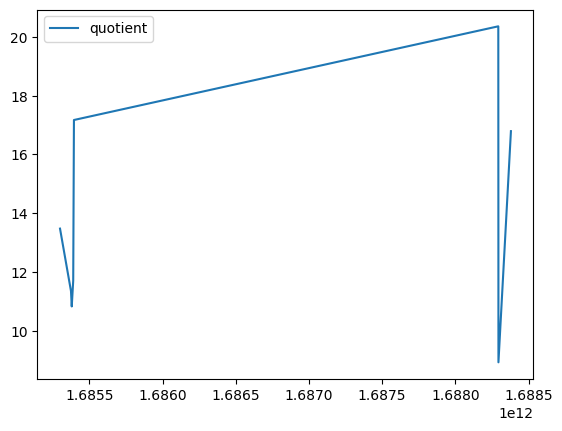

In [30]:
lastTen = r_df.iloc[-100:]
plt.plot(r_df["timestamp"], lastTen["minMinRatio"], label="quotient")
plt.legend()
plt.show()